In [2]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(scales)
library(NICHES)
library(stringr)
library(reshape2)
library(cowplot)

In [3]:
options(warn=-1)

In [5]:
female_24weeks_rds <- readRDS('../combined_female_24weeks.rds')

In [6]:
data.list <- SplitObject(female_24weeks_rds, split.by="sample_type")

In [7]:
data.list[1]
data.list[2]

$taPVAT_Control_24W_F
An object of class Seurat 
20743 features across 7534 samples within 1 assay 
Active assay: RNA (20743 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap


$taPVAT_HF_24W_F
An object of class Seurat 
20743 features across 8521 samples within 1 assay 
Active assay: RNA (20743 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap


In [8]:
table(data.list[[1]]@meta.data['celltype_broad'])
table(data.list[[2]]@meta.data['celltype_broad'])

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             4387              1790               735               239 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
               56                11               273                43 

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             5416              1697               720               241 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              112                23               281                31 

In [9]:
max.cells <- min(ncol(data.list[[1]]),ncol(data.list[[2]])) 

for (i in 1:length(data.list)){
  Idents(data.list[[i]]) <- data.list[[i]]$sample_type
  data.list[[i]] <- subset(data.list[[i]],cells = WhichCells(data.list[[i]],downsample = max.cells))
  Idents(data.list[[i]]) <- data.list[[i]]$celltype_broad
}


In [10]:
max.cells

[1] 7534

In [11]:
distribution <- data.frame(CTRL = table(Idents(data.list[[1]])),
                            HF = table(Idents(data.list[[2]])))
distribution <- reshape2::melt(distribution)

Using CTRL.Var1, HF.Var1 as id variables



In [12]:
distribution

CTRL.Var1         HF.Var1           variable  value
1  Adipocytes        Adipocytes        CTRL.Freq 4387 
2  Endothelial_Cells Endothelial_Cells CTRL.Freq 1790 
3  Immune_Cells      Immune_Cells      CTRL.Freq  239 
4  Pericytes         Fibroblasts       CTRL.Freq  273 
5  Fibroblasts       Pericytes         CTRL.Freq  735 
6  Mesothelial_Cells Mesothelial_Cells CTRL.Freq   56 
7  Neuronal_Cells    SMCs              CTRL.Freq   11 
8  SMCs              Neuronal_Cells    CTRL.Freq   43 
9  Adipocytes        Adipocytes        HF.Freq   4799 
10 Endothelial_Cells Endothelial_Cells HF.Freq   1498 
11 Immune_Cells      Immune_Cells      HF.Freq    223 
12 Pericytes         Fibroblasts       HF.Freq    629 
13 Fibroblasts       Pericytes         HF.Freq    246 
14 Mesothelial_Cells Mesothelial_Cells HF.Freq     95 
15 Neuronal_Cells    SMCs              HF.Freq     25 
16 SMCs              Neuronal_Cells    HF.Freq     19

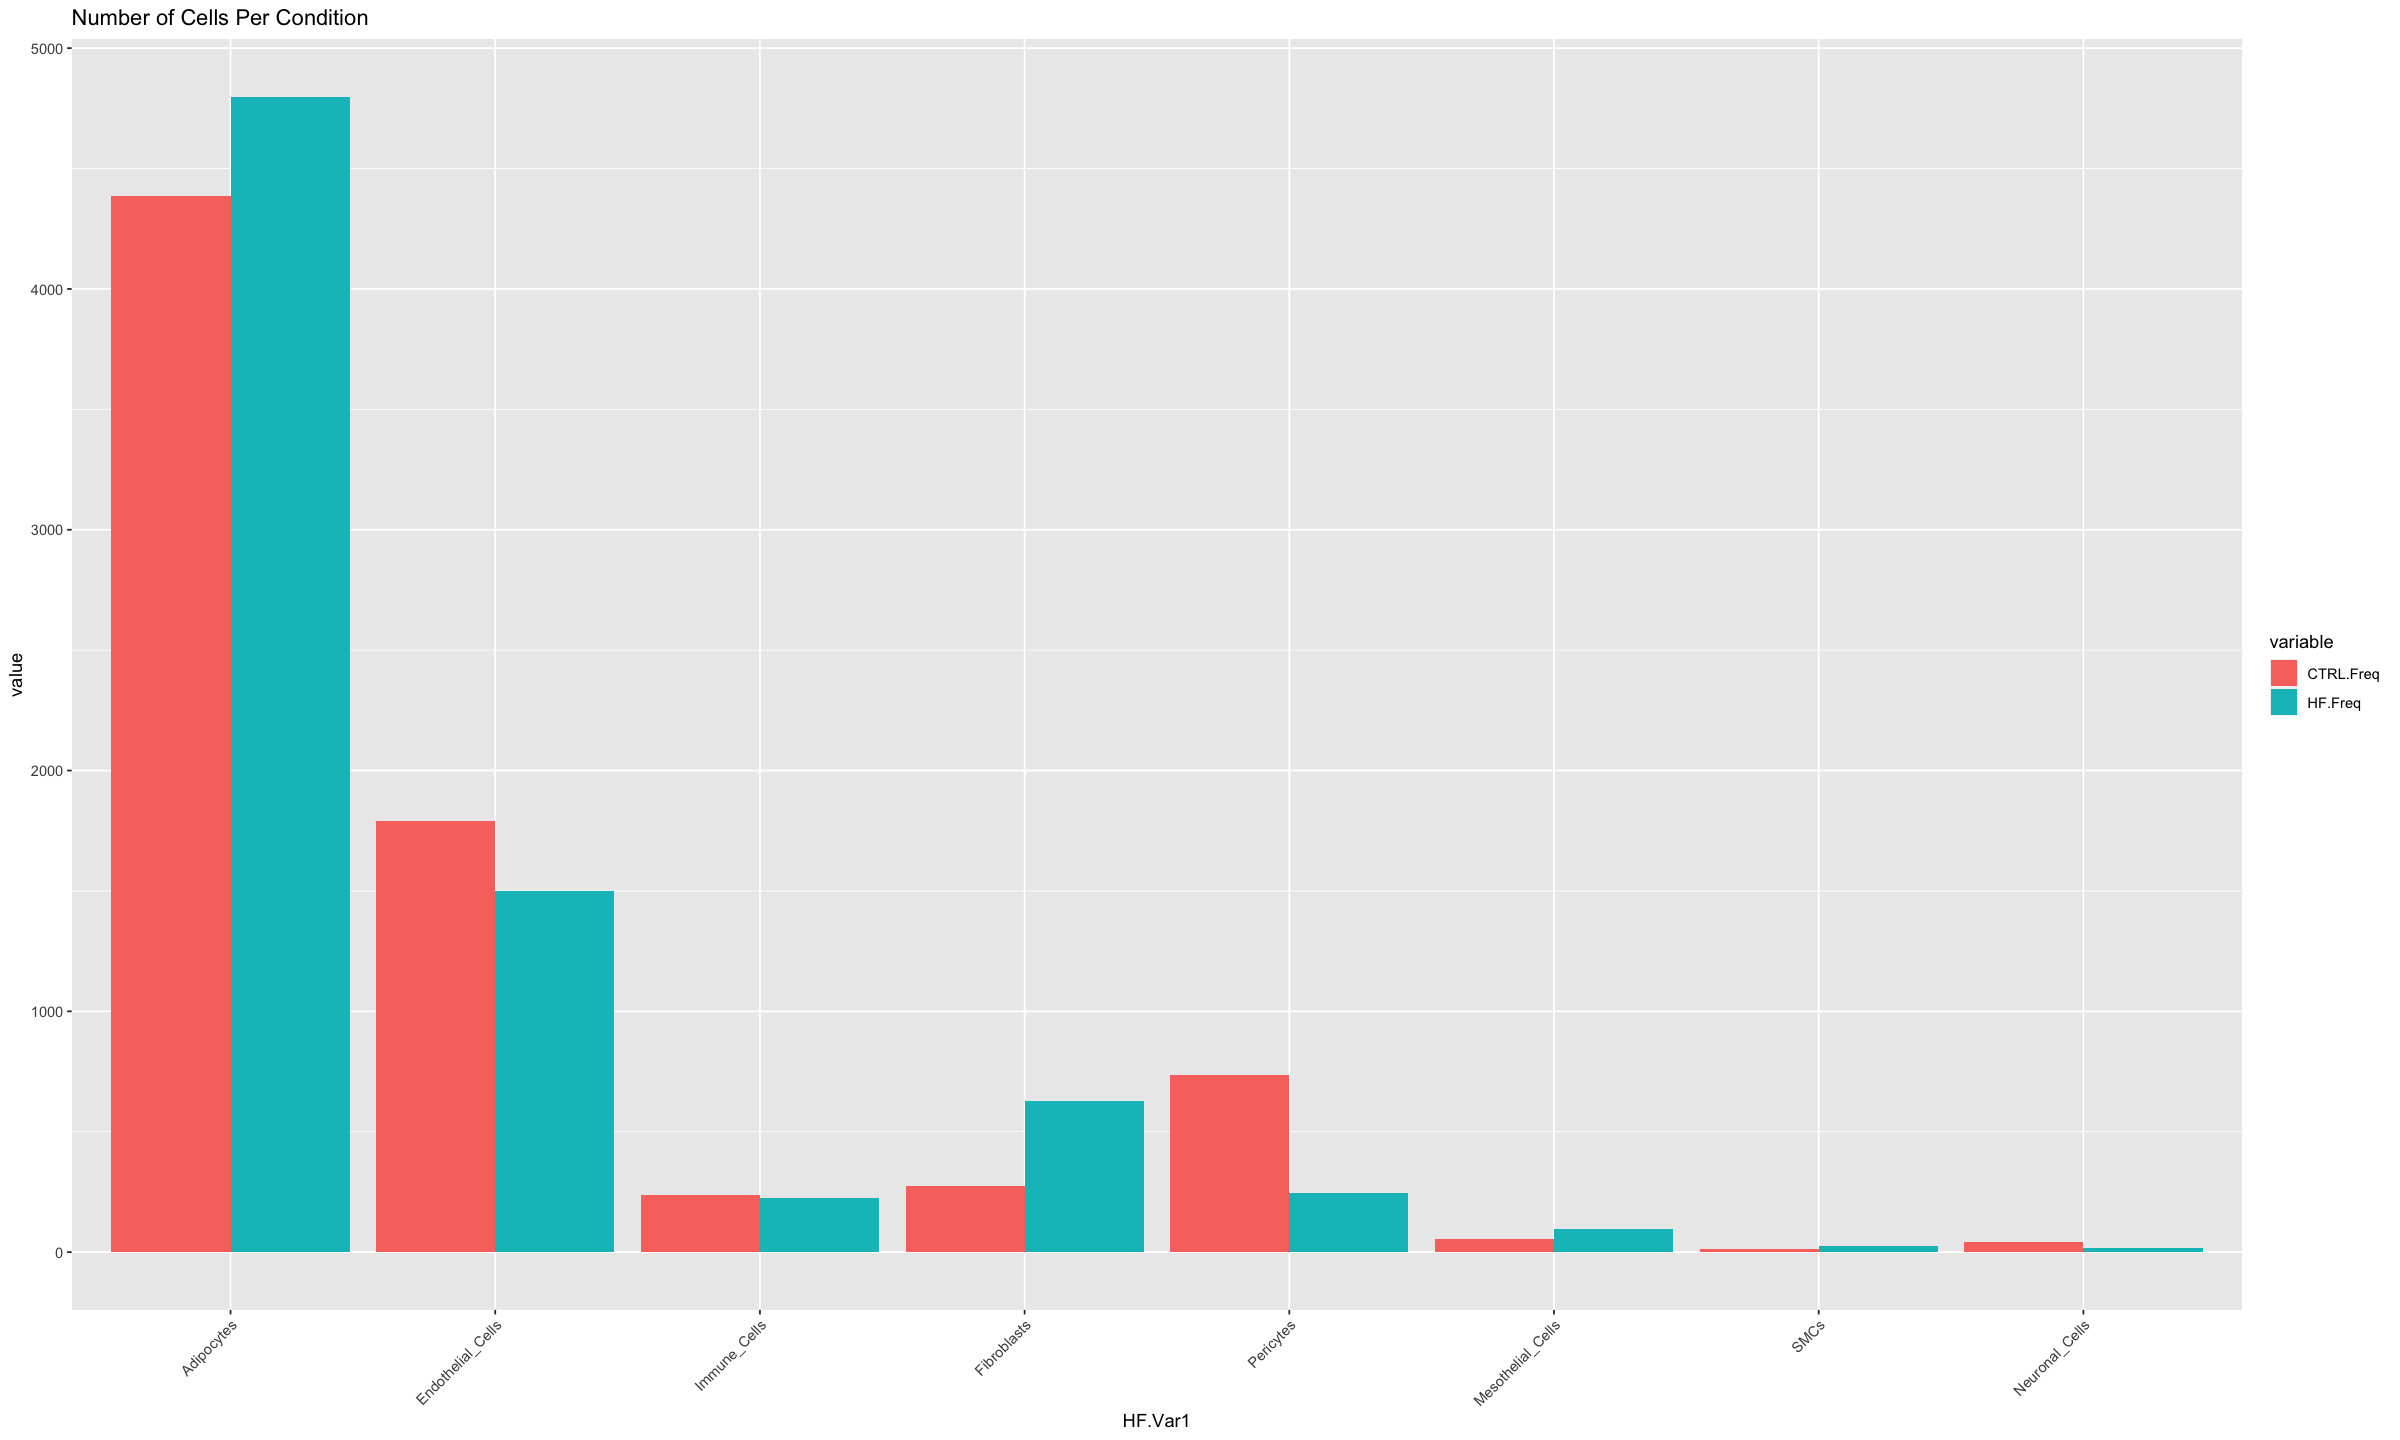

In [13]:
options(repr.plot.width=20, repr.plot.height=12)

ggplot(data = distribution,aes(x = HF.Var1,y=value,fill = variable))+geom_bar(stat='identity',position='dodge')+
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
  ggtitle('Number of Cells Per Condition')

In [14]:
ncol(data.list[[1]])==ncol(data.list[[2]])

[1] TRUE

In [15]:
table(data.list[[1]]@meta.data['celltype_broad'])
table(data.list[[2]]@meta.data['celltype_broad'])

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             4387              1790               735               239 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
               56                11               273                43 

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             4799              1498               629               223 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
               95                19               246                25 

In [16]:
# Run NICHES on each system and store/name the outputs
scc.list <- list()
for(i in 1:length(data.list)){
  print(i)
  scc.list[[i]] <- RunNICHES(data.list[[i]],
                             LR.database="fantom5",
                             species="mouse",
                             assay="RNA",
                             cell_types = 'celltype_broad',
                             min.cells.per.ident=1,
                             min.cells.per.gene = 50,
                             meta.data.to.map = c('orig.ident','celltype_broad','sample_type'),
                             SystemToCell = T,
                             CellToCell = T,
                             blend = 'mean')
}
names(scc.list) <- names(data.list)

[1] 1


Set cell types as Identity of object internally


 Subsetting to populations with greater than 1 cells


 Subsetting to genes expressed in greater than 50 cells


 7534 distinct cells from 8 celltypes to be analyzed


 Limiting ground truth to genes within dataset


 Mapping against 671 ground truth signaling mechanisms


 For sampling purposes, please make sure that the active Identity of the input seurat object corresponds to cell types

Normalizing layer: counts


 18834 Cell-To-Cell edges computed, sampling 64 distinct VectorTypes, out of 64 total possible

Normalizing layer: counts


 7534 System-To-Cell edges were computed, across 8 cell types



[1] 2


Set cell types as Identity of object internally


 Subsetting to populations with greater than 1 cells


 Subsetting to genes expressed in greater than 50 cells


 7534 distinct cells from 8 celltypes to be analyzed


 Limiting ground truth to genes within dataset


 Mapping against 663 ground truth signaling mechanisms


 For sampling purposes, please make sure that the active Identity of the input seurat object corresponds to cell types

Normalizing layer: counts


 17822 Cell-To-Cell edges computed, sampling 64 distinct VectorTypes, out of 64 total possible

Normalizing layer: counts


 7534 System-To-Cell edges were computed, across 8 cell types



In [17]:
scc.list

$taPVAT_Control_24W_F
$taPVAT_Control_24W_F$CellToCell
An object of class Seurat 
671 features across 18834 samples within 1 assay 
Active assay: CellToCell (671 features, 0 variable features)
 2 layers present: counts, data

$taPVAT_Control_24W_F$SystemToCell
An object of class Seurat 
671 features across 7534 samples within 1 assay 
Active assay: SystemToCell (671 features, 0 variable features)
 2 layers present: counts, data


$taPVAT_HF_24W_F
$taPVAT_HF_24W_F$CellToCell
An object of class Seurat 
663 features across 17822 samples within 1 assay 
Active assay: CellToCell (663 features, 0 variable features)
 2 layers present: counts, data

$taPVAT_HF_24W_F$SystemToCell
An object of class Seurat 
663 features across 7534 samples within 1 assay 
Active assay: SystemToCell (663 features, 0 variable features)
 2 layers present: counts, data



In [18]:
temp.list <- list()
for(i in 1:length(scc.list)){
temp.list[[i]] <- scc.list[[i]]$SystemToCell # Isolate SystemToCell Signaling, which is all that will be covered in this vignette
temp.list[[i]]$Condition <- names(scc.list)[i] # Tag with metadata
}

In [19]:
temp.list[[1]]@meta.data

orig.ident    nCount_SystemToCell
System—AAACCCACACACCTTC-1-12 SeuratProject  93.40156          
System—AAACGAATCGTAATGC-1-12 SeuratProject  48.94824          
System—AAACGAATCTATACTC-1-12 SeuratProject  63.79510          
System—AAACGCTCAGCAAGAC-1-12 SeuratProject 106.12644          
System—AAACGCTGTTAAGGGC-1-12 SeuratProject  53.58274          
System—AAACGCTTCGGTAAGG-1-12 SeuratProject 117.68762          
System—AAAGAACCAATACAGA-1-12 SeuratProject  14.19350          
System—AAAGAACGTCTAGGCC-1-12 SeuratProject  22.50951          
System—AAAGGGCCATGGAGAC-1-12 SeuratProject  25.12594          
System—AAAGGTAAGGTAGATT-1-12 SeuratProject  57.67991          
System—AAAGGTAGTTCTCCTG-1-12 SeuratProject  82.76624          
System—AAAGTGAAGTACAACA-1-12 SeuratProject  50.52803          
System—AAAGTGAGTACCTTCC-1-12 SeuratProject  86.42922          
System—AAATGGACAGTGGTGA-1-12 SeuratProject  67.41196          
System—AACAAAGAGTAACAGT-1-12 SeuratProject  90.23206          
System—AACAAAGCAATCAAGA-1-12 SeuratProject  56.95916          
System—AACAACCTCAAGTCTG-1-12 SeuratProject  90.26836          
System—AACACACGTAGTACGG-1-12 SeuratProject  71.09909          
System—AACACACTCGCATGAT-1-12 SeuratProject  43.67194          
System—AACACACTCTACACAG-1-12 SeuratProject  53.58972          
System—AACAGGGAGAGCCGTA-1-12 SeuratProject  85.23457          
System—AACAGGGGTATCATGC-1-12 SeuratProject  96.02004          
System—AACAGGGTCCAAGCAT-1-12 SeuratProject  84.86606          
System—AACCAACTCTTCACAT-1-12 SeuratProject  32.88969          
System—AACCATGCATCCGTGG-1-12 SeuratProject  64.93152          
System—AACCCAAGTACGATGG-1-12 SeuratProject  92.53478          
System—AACCTGAAGACCTTTG-1-12 SeuratProject 117.14590          
System—AACCTGAAGCCTGGAA-1-12 SeuratProject  63.79602          
System—AACCTGACAAGAATAC-1-12 SeuratProject  89.57689          
System—AACCTTTTCACTCGAA-1-12 SeuratProject 110.23311          
⋮                            ⋮             ⋮                  
System—TTGTTCATCAGCTCTC-1-19 SeuratProject  43.72754          
System—TTGTTGTGTTATCTTC-1-19 SeuratProject  41.03057          
System—TTGTTTGCAGCCTTCT-1-19 SeuratProject  83.70659          
System—TTGTTTGTCTCGCTCA-1-19 SeuratProject  45.58543          
System—TTTACCACATTGTGCA-1-19 SeuratProject  18.29290          
System—TTTACCATCCTGCTAC-1-19 SeuratProject  72.01709          
System—TTTACTGAGTGCAACG-1-19 SeuratProject  26.94011          
System—TTTACTGGTATCGGTT-1-19 SeuratProject  24.88976          
System—TTTACTGTCTTTGCTA-1-19 SeuratProject  63.27974          
System—TTTCAGTCAATACGAA-1-19 SeuratProject  82.93725          
System—TTTCAGTTCCGGACTG-1-19 SeuratProject  63.55909          
System—TTTCATGAGAGCCCAA-1-19 SeuratProject  65.85539          
System—TTTCATGAGATGACCG-1-19 SeuratProject  79.26320          
System—TTTCATGAGCCTAACT-1-19 SeuratProject  30.38740          
System—TTTCATGAGGGACACT-1-19 SeuratProject  54.45344          
System—TTTCGATCAGTTCTAG-1-19 SeuratProject  72.22690          
System—TTTCGATTCCTAAACG-1-19 SeuratProject  67.18378          
System—TTTGACTAGCAGCCTC-1-19 SeuratProject  87.64308          
System—TTTGACTAGCGTGAAC-1-19 SeuratProject 118.10013          
System—TTTGACTAGTAGCATA-1-19 SeuratProject  30.18113          
System—TTTGACTGTCAATGGG-1-19 SeuratProject  66.64649          
System—TTTGATCGTACAGTAA-1-19 SeuratProject  42.92899          
System—TTTGGAGAGGCGTCCT-1-19 SeuratProject  91.46410          
System—TTTGGAGCAAGTAGTA-1-19 SeuratProject  89.05176          
System—TTTGGAGCACCGTCTT-1-19 SeuratProject  87.27583          
System—TTTGGTTAGCCTCATA-1-19 SeuratProject  62.30365          
System—TTTGGTTCAAGATCCT-1-19 SeuratProject  77.32419          
System—TTTGGTTCACATGACT-1-19 SeuratProject  64.44447          
System—TTTGTTGGTACGTTCA-1-19 SeuratProject  35.32563          
System—TTTGTTGGTGGTCAAG-1-19 SeuratProject  41.03022          
                             nFeature_SystemToCell ReceivingCell        
System—AAACCCACACACCTTC-1-12 108                  

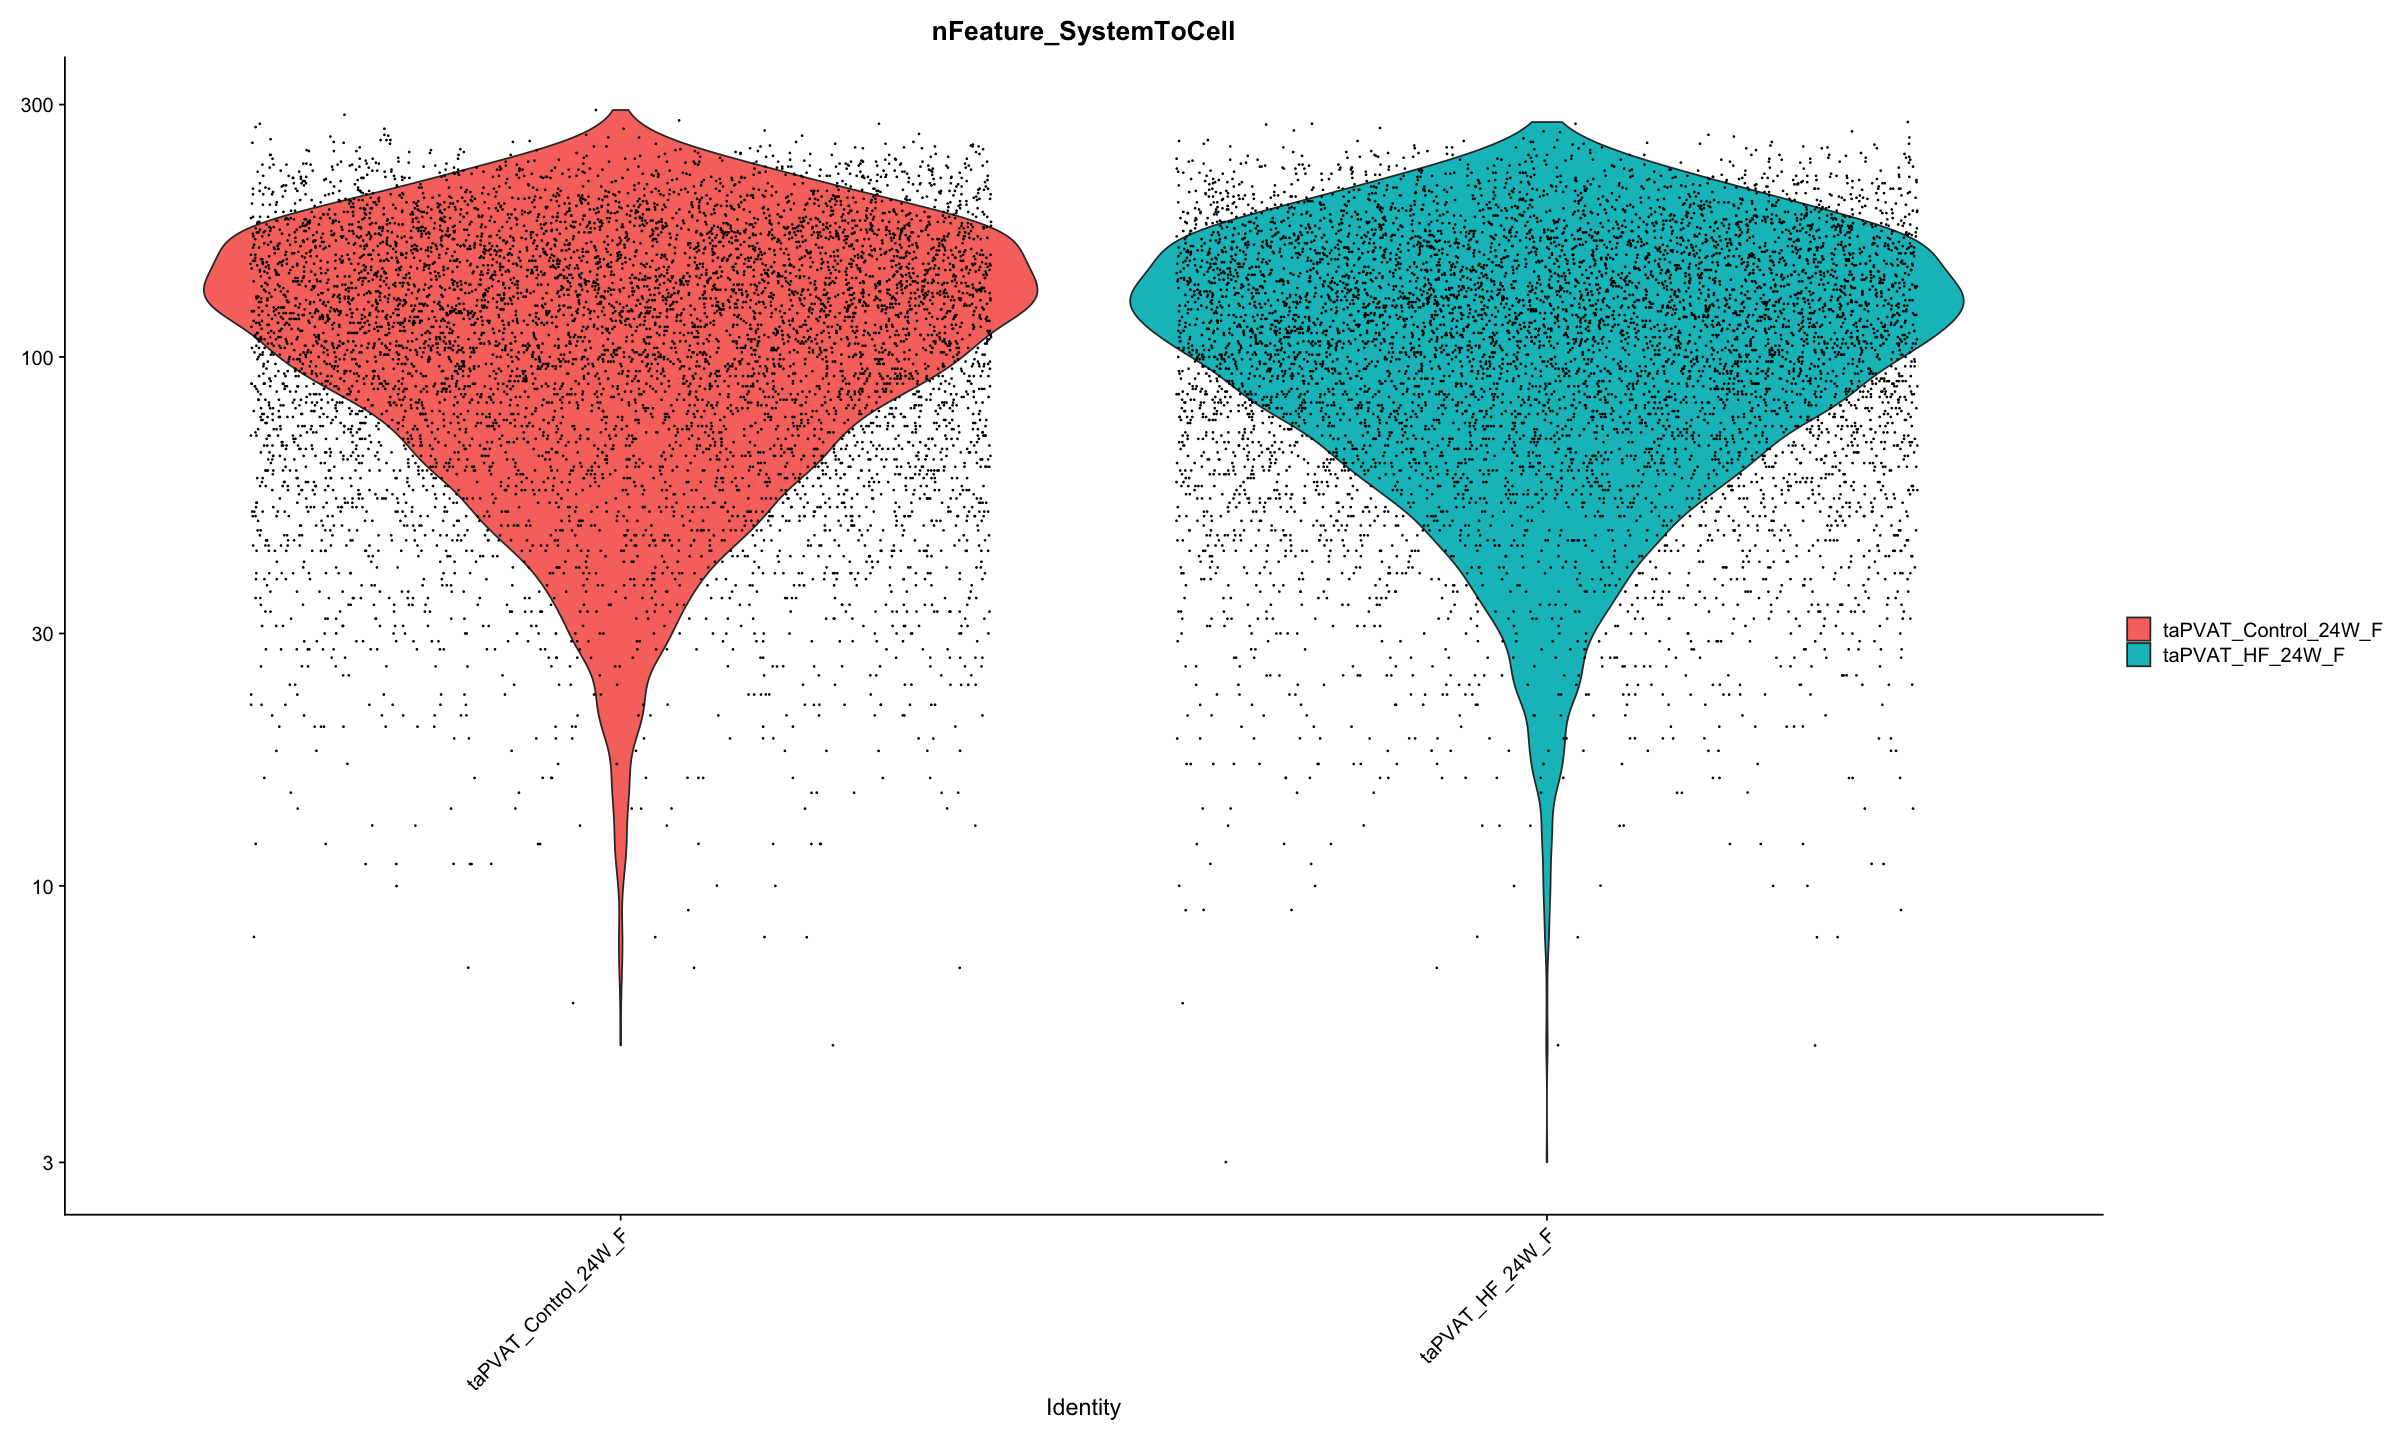

In [20]:
# Merge together
scc.merge <- merge(temp.list[[1]],temp.list[2])

# Clean up low-information crosses (connectivity data can be very sparse)
VlnPlot(scc.merge,features = 'nFeature_SystemToCell',group.by = 'Condition',pt.size=0.1,log = T)

In [21]:
scc.sub <- subset(scc.merge,nFeature_SystemToCell > 5) # Requesting at least 5 distinct ligand-receptor interactions per measurement

Centering and scaling data matrix

Finding variable features for layer data.1

Finding variable features for layer data.2

PC_ 1 
Positive:  Pdgfc—Flt1, Vegfc—Flt1, Vegfb—Flt1, Pigf—Flt1, Vegfa—Flt1, Tgfb3—Eng, Tgfb2—Eng, Tgfb1—Eng, Ptn—Ptprb, Efnb2—Pecam1 
	   Lamc1—Itga6, Lamb1—Itga6, Lama5—Itga6, Dusp18—Itga6, Lama2—Itga6, Col6a1—Itga6, Lamb3—Itga6, Col3a1—Itgb1, Nid1—Itgb1, Col1a1—Itgb1 
	   Lamc1—Itgb1, Lamb1—Itgb1, Lama5—Itgb1, Dusp18—Itgb1, Lama2—Itgb1, Col6a2—Itgb1, Col4a4—Itgb1, Col4a3—Itgb1, Col1a2—Itgb1, Col18a1—Itgb1 
Negative:  Ntf3—Ntrk3, Dkk2—Lrp6, App—Lrp1, Psap—Lrp1, F8—Lrp1, Rspo3—Lrp6, Lpl—Lrp1, Apoe—Lrp1, Serpine2—Lrp1, Serping1—Lrp1 
	   Plat—Lrp1, Tfpi—Lrp1, Hsp90b1—Lrp1, Igfbp4—Lrp6, Lrpap1—Lrp1, Calr—Lrp1, Ptn—Ptprs, Pdgfb—Lrp1, Hspg2—Ptprs, Apoe—Sorl1 
	   B2m—Tfrc, Lrpap1—Sorl1, Nrg1—Erbb4, Egf—Erbb4, Nrg4—Erbb4, Adam17—Erbb4, Dcn—Erbb4, Tgfa—Erbb4, Gnas—Adrb3, Adam12—Sdc4 
PC_ 2 
Positive:  Pdgfc—Flt1, Vegfc—Flt1, Pigf—Flt1, Vegfa—Flt1, Vegfb—Flt1, Lamb3—Itga

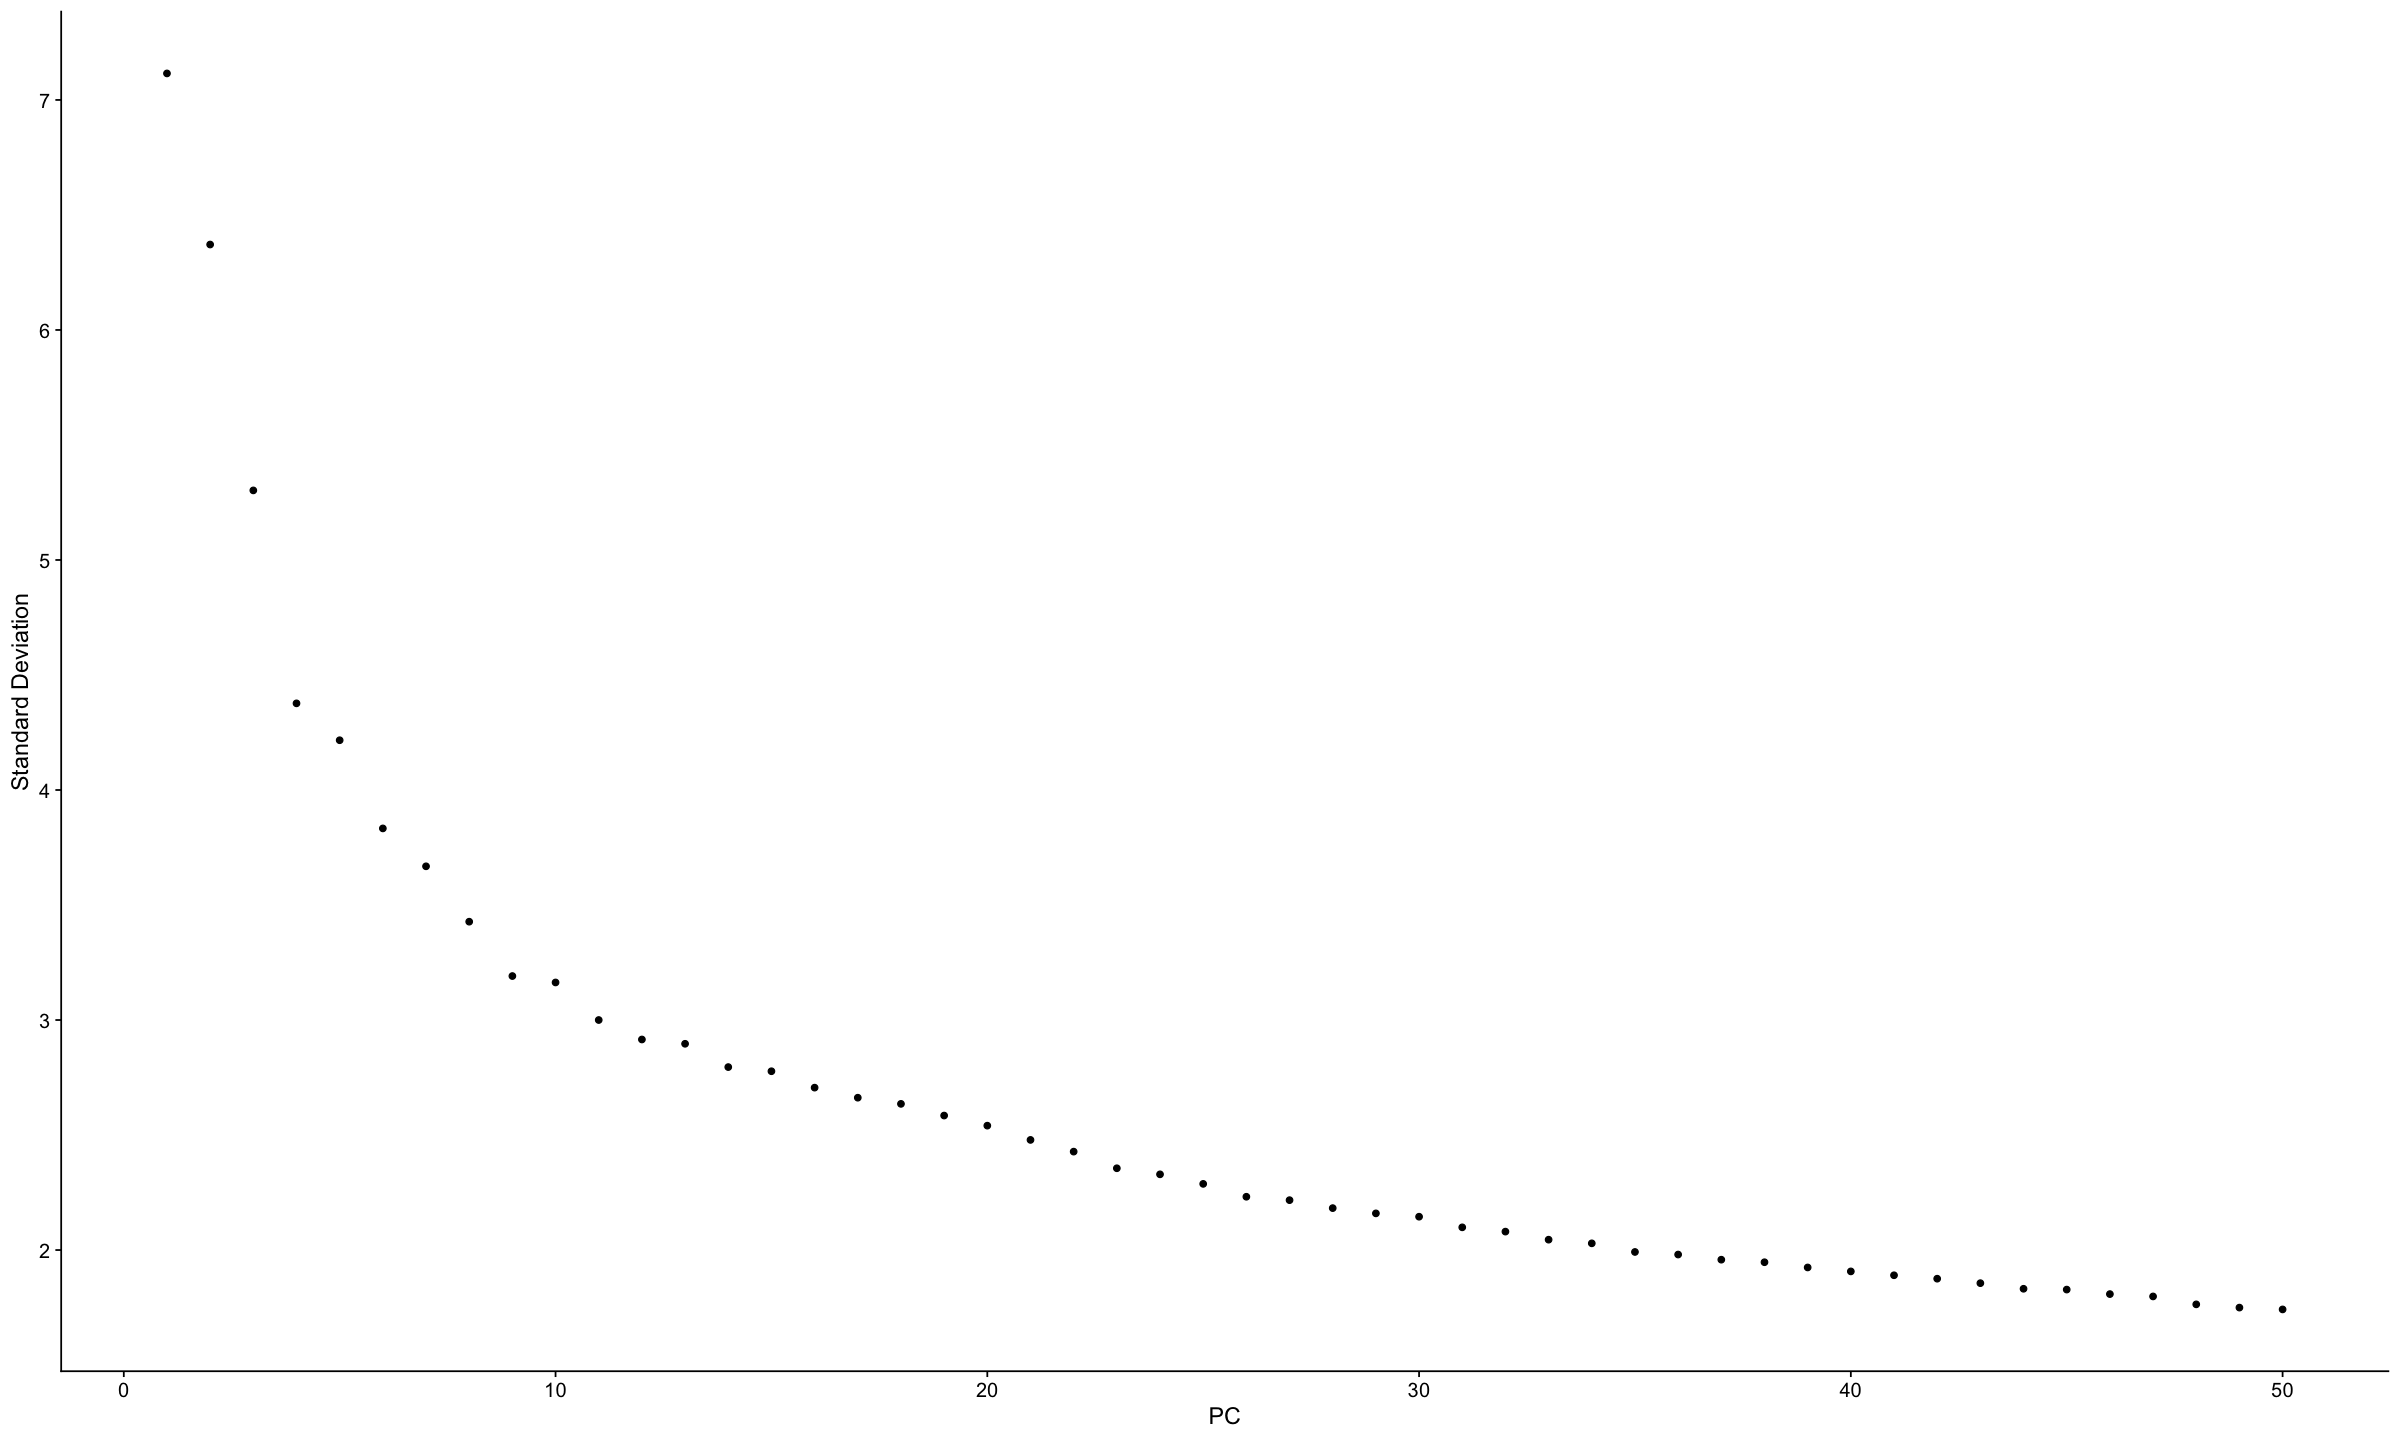

In [22]:
# Perform initial visualization
scc.sub <- ScaleData(scc.sub)
scc.sub <- FindVariableFeatures(scc.sub,selection.method = "disp")
scc.sub <- RunPCA(scc.sub,npcs = 50)
ElbowPlot(scc.sub,ndim=50)

12:49:38 UMAP embedding parameters a = 0.9922 b = 1.112

12:49:38 Read 15062 rows and found 10 numeric columns

12:49:38 Using Annoy for neighbor search, n_neighbors = 30

12:49:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:49:39 Writing NN index file to temp file /var/folders/kk/5gbzbkc93xb_g56p3bt9t8gh0000gp/T//RtmpZUFPus/file96677e366d0c

12:49:39 Searching Annoy index using 1 thread, search_k = 3000

12:49:43 Annoy recall = 100%

12:49:44 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:49:45 Initializing from normalized Laplacian + noise (using RSpectra)

12:49:45 Commencing optimization for 200 epochs, with 578138 positive edges

12:49:58 Optimization finished



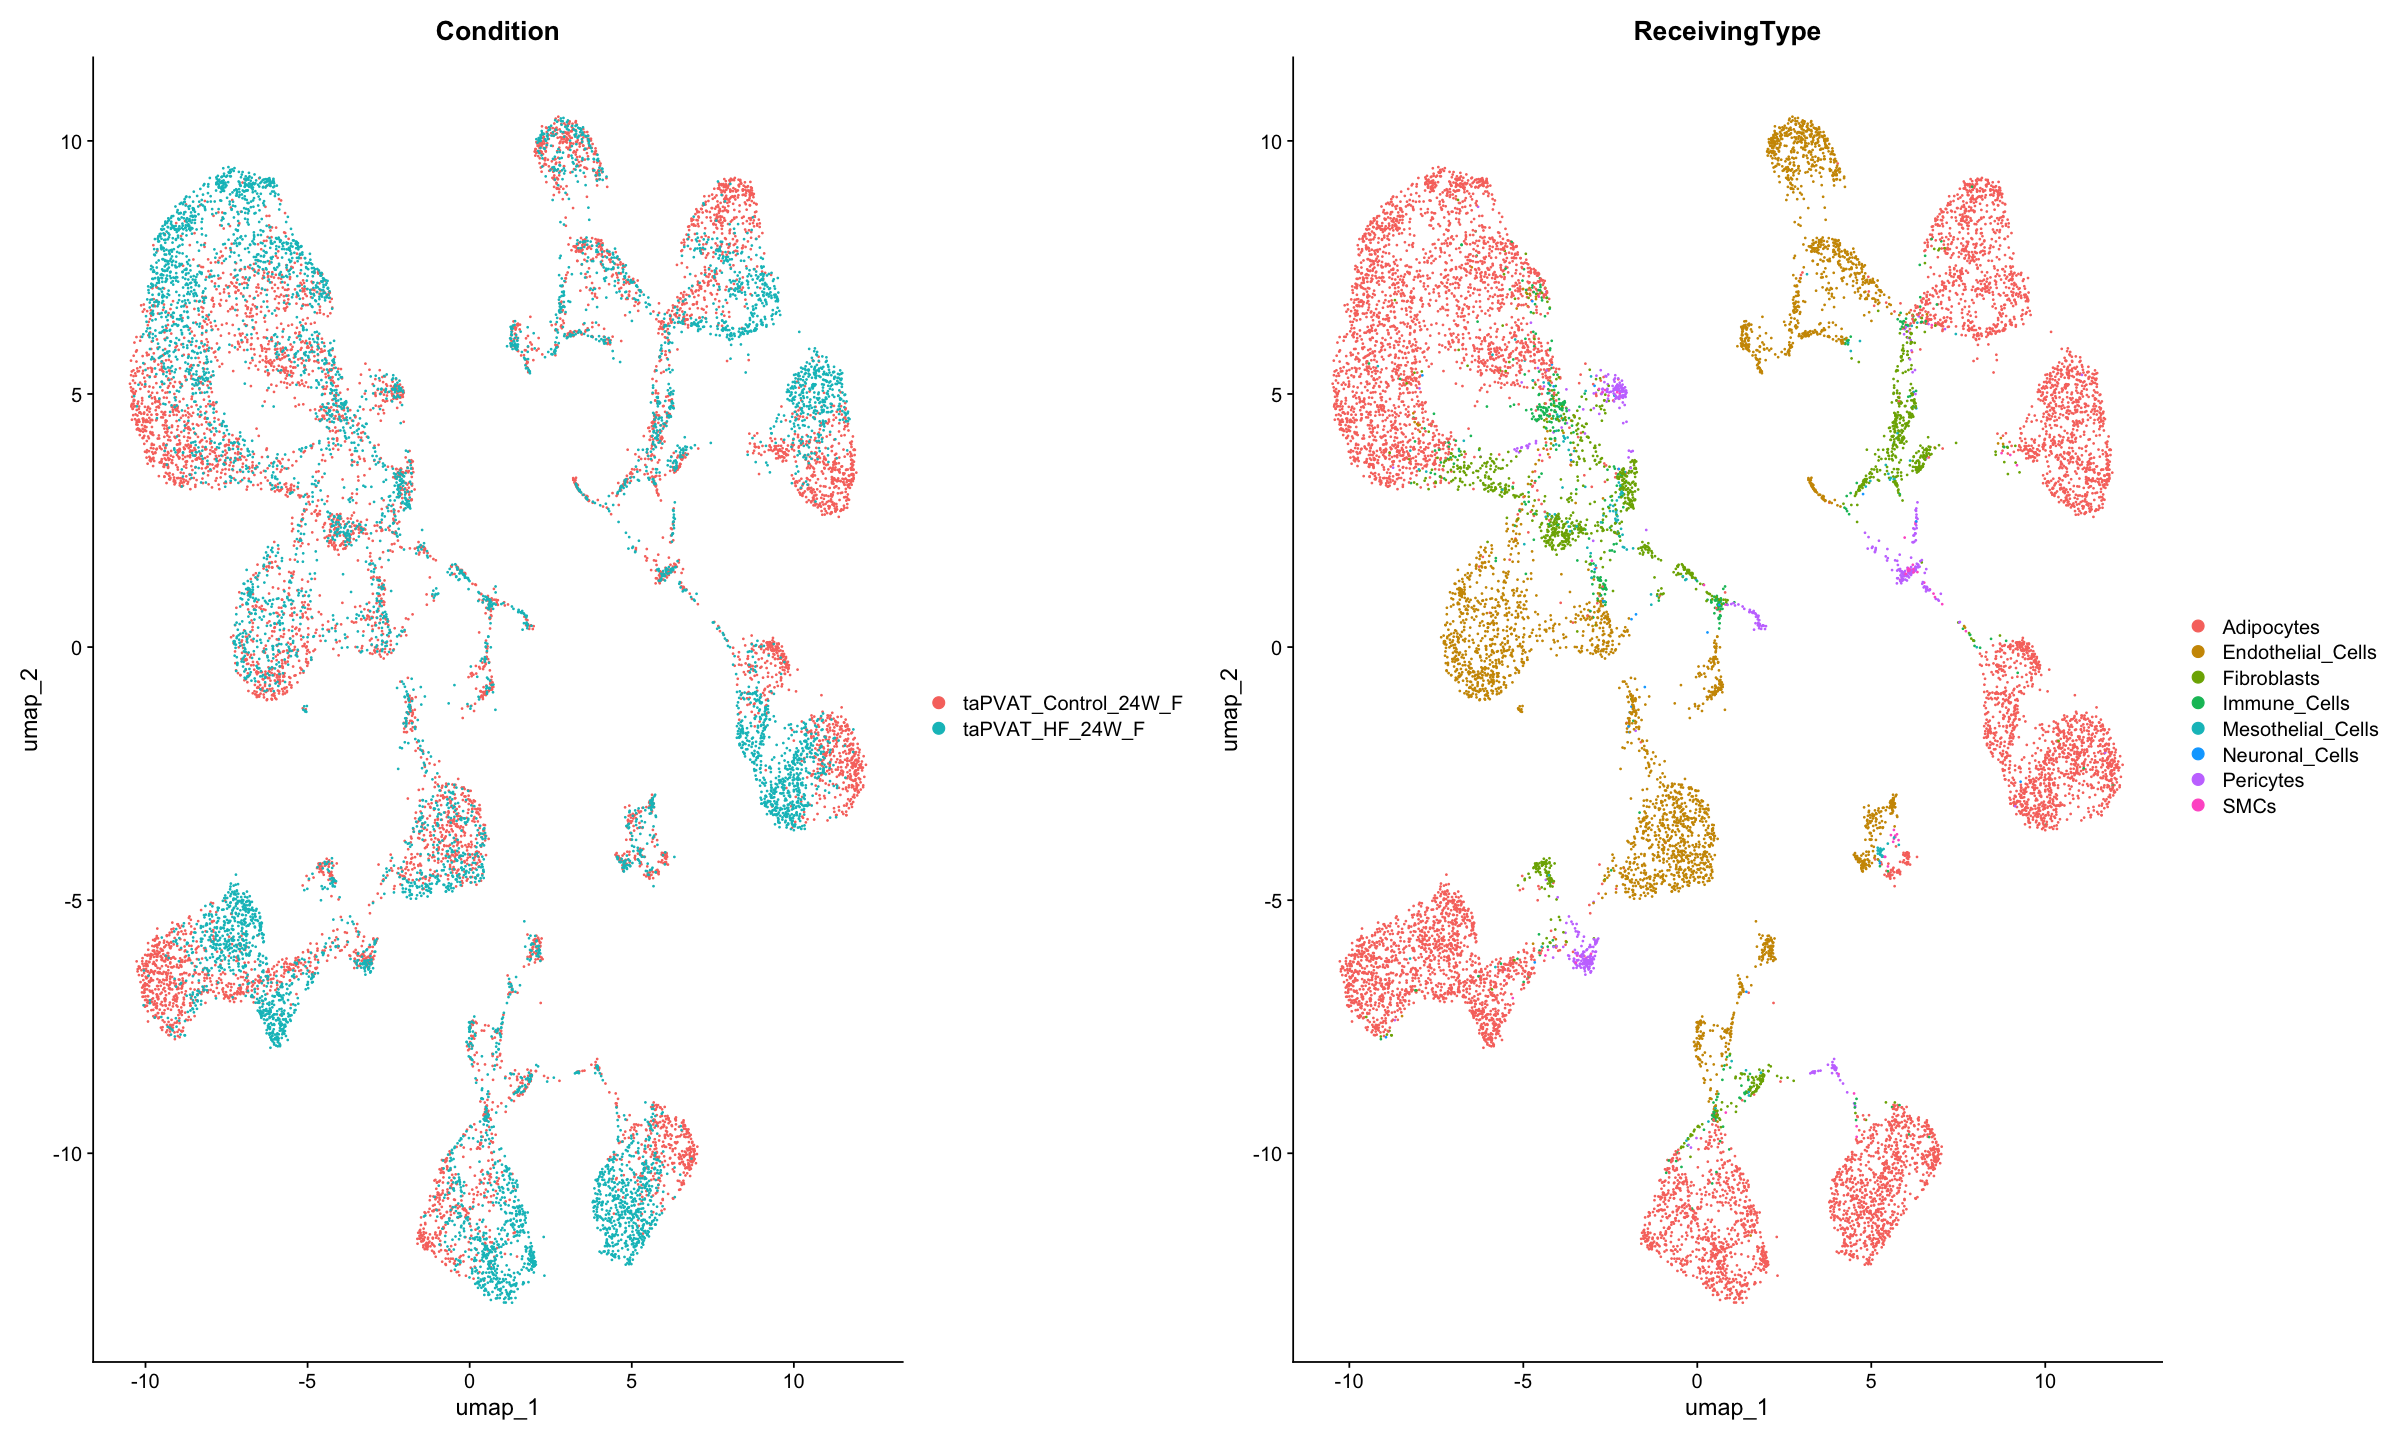

In [24]:
scc.sub <- RunUMAP(scc.sub,dims = 1:10)
p1 <- DimPlot(scc.sub,group.by = 'Condition')
p2 <- DimPlot(scc.sub,group.by = 'ReceivingType')
plot_grid(p1,p2)

In [25]:
unique(scc.sub@meta.data$ReceivingType)
COI <- "Adipocytes"

[1] "Adipocytes"        "Endothelial_Cells" "Immune_Cells"     
[4] "Pericytes"         "Fibroblasts"       "Mesothelial_Cells"
[7] "Neuronal_Cells"    "SMCs"

In [26]:
results <- lapply(COI, function(x){
 
  #subset
  subs <- subset(scc.sub, subset = ReceivingType == x)

  subs <- JoinLayers(subs, layers = c("data", "scale.data"))
  
  #print number of cells per condition
  print(paste0(x , ":  taPVAT_Control_24W_F:", sum(subs@meta.data$Condition == "taPVAT_Control_24W_F")))
  print(paste0(x , ":  taPVAT_HF_24W_F:", sum(subs@meta.data$Condition == "taPVAT_HF_24W_F")))
  
  #set idents
  Idents(subs) <- subs@meta.data$Condition
  
  #scale the subsetted data
  FindVariableFeatures(subs,assay='SystemToCell',selection.method = "disp")
  ScaleData(subs, assay='SystemToCell')
  
  #find markers (here we use ROC)
  markers <- FindAllMarkers(subs, test.use = "roc",assay='SystemToCell',
                            min.pct = 0.1,logfc.threshold = 0.1,
                            return.thresh = 0.1,only.pos = T)
  print(markers)
  
  #subset to top 10 markers per condition
  top10 <- markers %>% group_by(cluster) %>% top_n(n = 10, wt = myAUC)
  list(subs = subs, top10 = top10)
  
  #Make a heatmap
  #DoHeatmap(subs,group.by="ident",features=top10$gene, assay="SystemToCell") +  ggtitle("Top DE SystemToCell Mechanisms, CTRL vs STIM: ",x)
 
  
})

options(repr.plot.width=20, repr.plot.height=12)
options(warn=-1)

subs <- results[[1]]$subs
top10 <- results[[1]]$top10

[1] "Adipocytes:  taPVAT_Control_24W_F:4386"
[1] "Adipocytes:  taPVAT_HF_24W_F:4796"


Finding variable features for layer data

Centering and scaling data matrix

Calculating cluster taPVAT_Control_24W_F

Calculating cluster taPVAT_HF_24W_F



                 myAUC     avg_diff power avg_log2FC pct.1 pct.2
Cntn4—Ptprg      0.823 0.0244730223 0.646  6.9058577 0.645 0.000
Serpine1—Lrp1    0.822 0.0276464858 0.644  7.0825311 0.645 0.000
Serpinc1—Lrp1    0.822 0.0156096298 0.644  6.2582290 0.645 0.000
Fgf14—Fgfr1      0.806 0.0186739723 0.612  6.5156258 0.611 0.000
Sema3g—Nrp2      0.761 0.0115739248 0.522  5.8309776 0.522 0.000
Rspo4—Lgr4       0.728 0.0126388204 0.456  5.9563805 0.457 0.000
Bmp5—Bmpr2       0.728 0.0172380432 0.456  6.4006030 0.456 0.000
Adipoq—Adipor2   0.725 0.4041501386 0.450  1.0659936 0.775 0.724
Tgfb1—Tgfbr3     0.710 0.0393723298 0.420  0.9812270 0.694 0.675
Gnas—Gcgr        0.704 3.1977587216 0.408 16.7808434 0.408 0.000
Tgfb2—Tgfbr3     0.687 0.0832891402 0.374  0.8414583 0.694 0.675
Igf1—Insr        0.683 0.3084478825 0.366  1.2141277 0.655 0.567
Hras—Insr        0.683 0.0135649095 0.366  0.9410727 0.655 0.567
Lgals3bp—Itgb1   0.681 0.0084954208 0.362  5.3926979 0.363 0.000
Igfbp4—Lrp6      0.680 0.

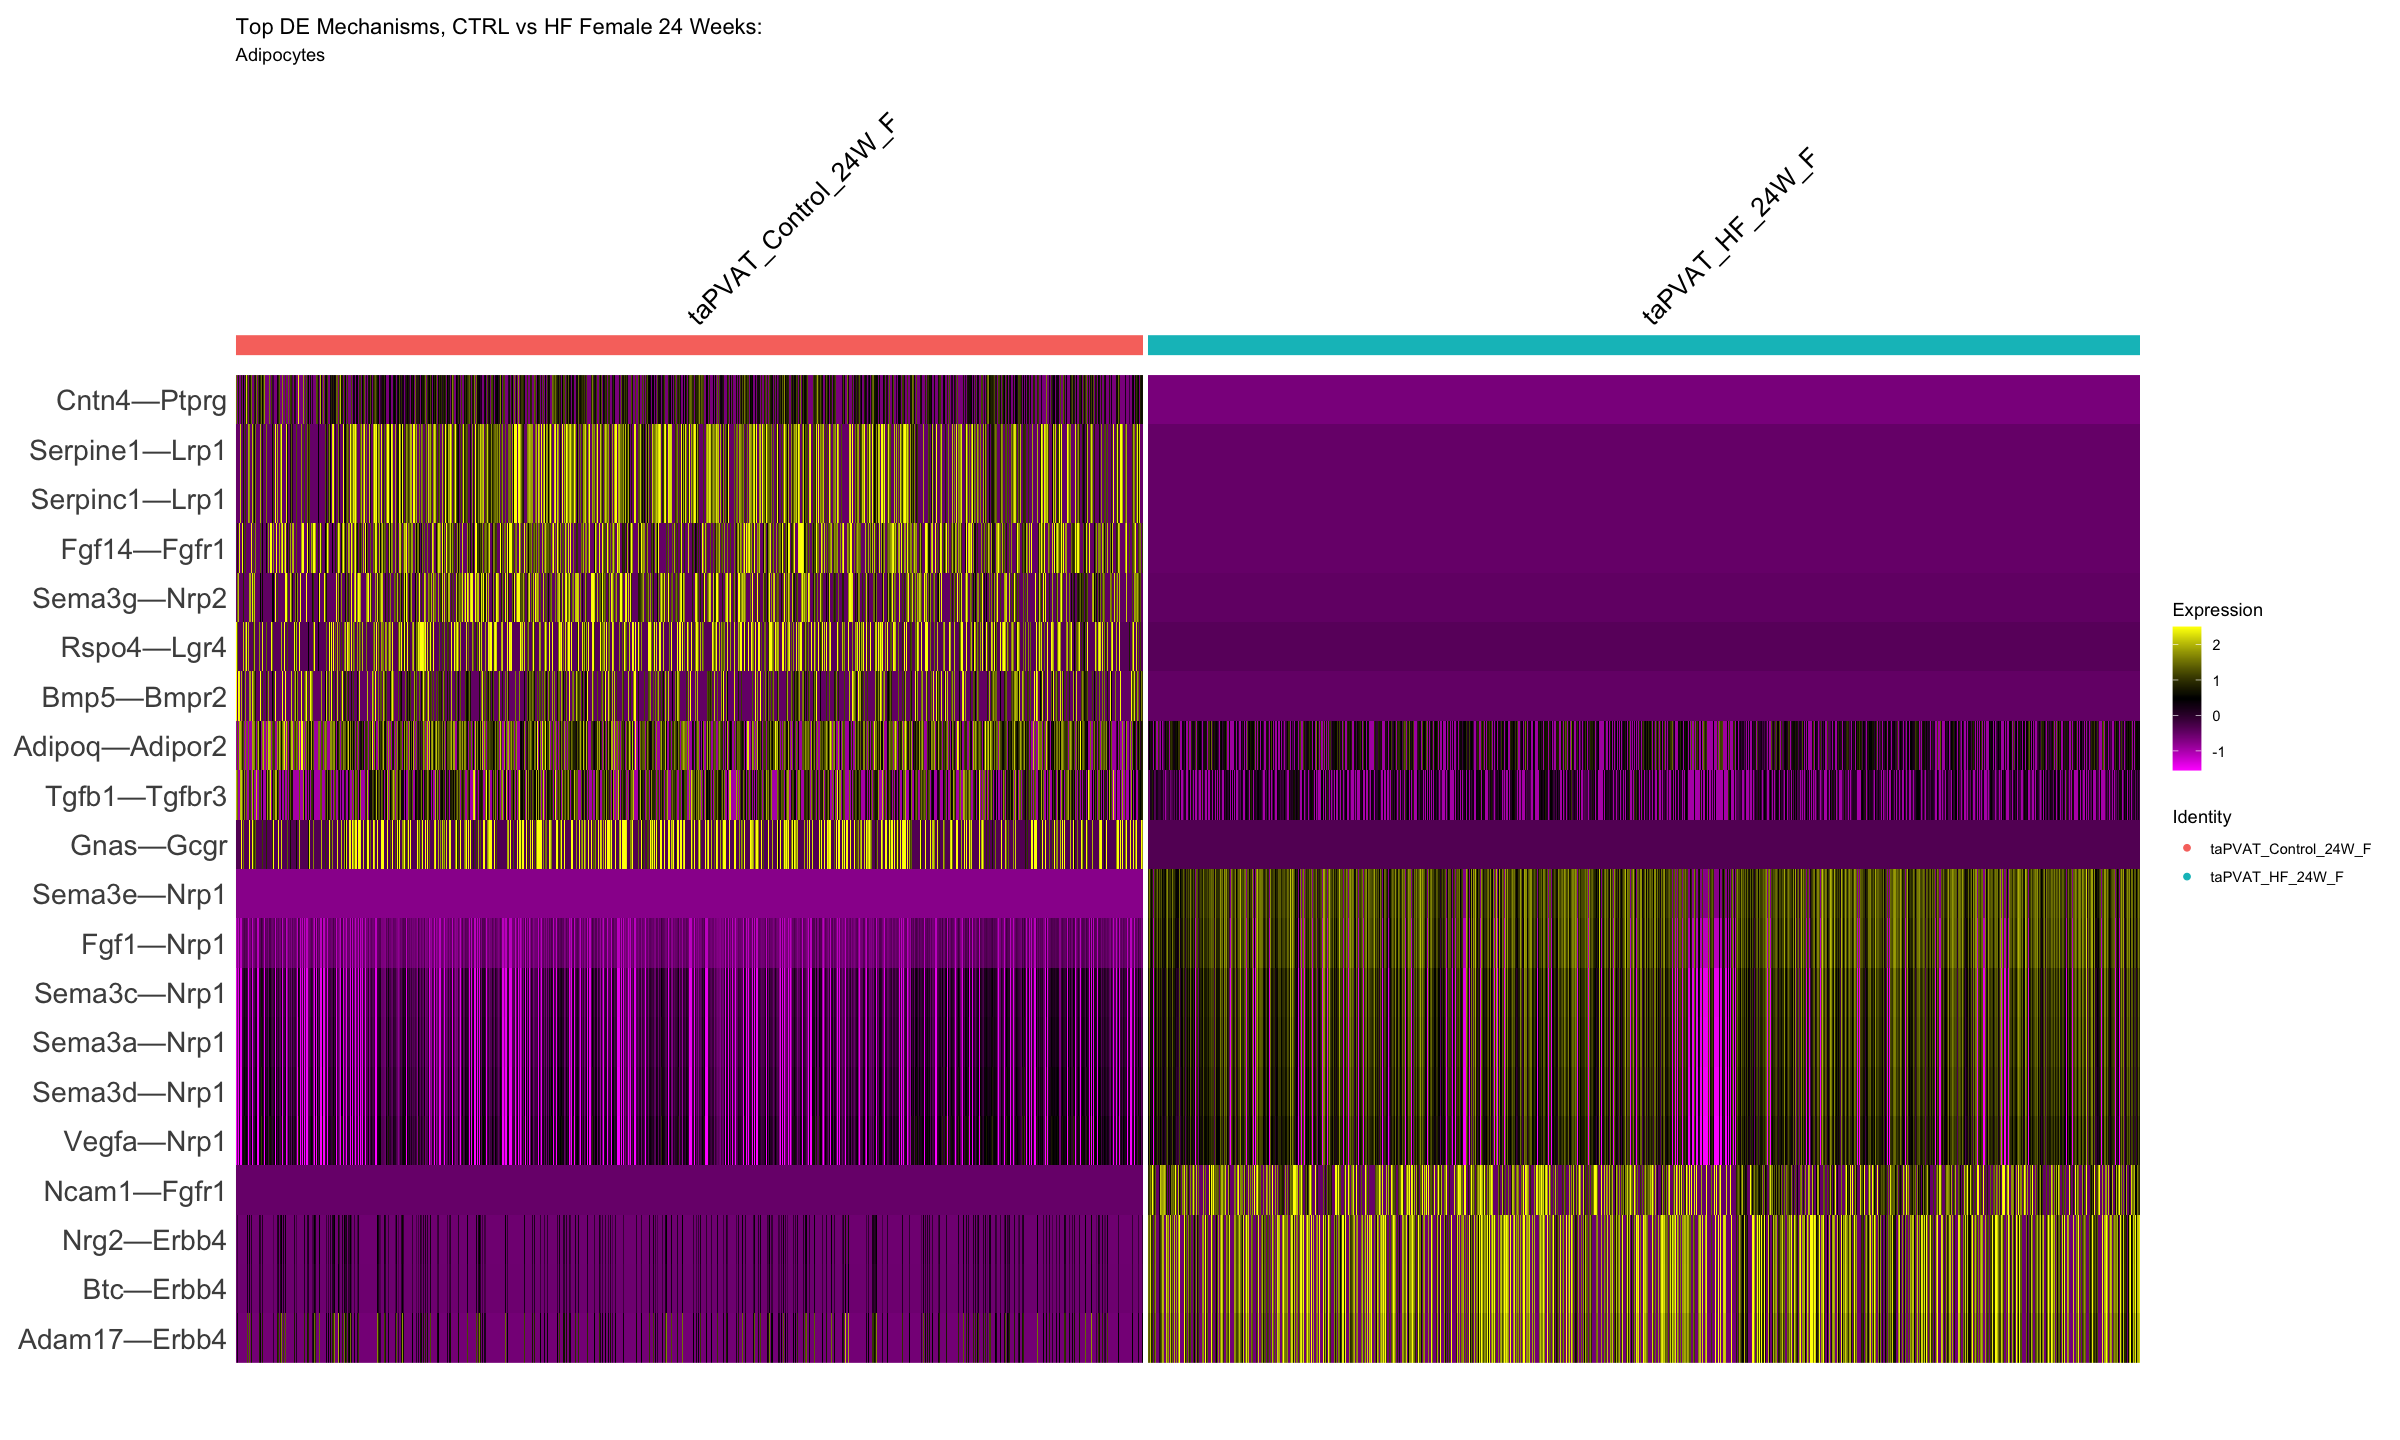

In [27]:
DoHeatmap(subs,group.by="ident",features=top10$gene, assay="SystemToCell") +  ggtitle("Top DE Mechanisms, CTRL vs HF Female 24 Weeks: ",COI) + theme(#axis.text.x = element_text(face = "italic", size = 20),
                                                                   axis.text.y = element_text(size = 17))
                                                                   #axis.title.x = element_text(size = 20),
                                                                   #axis.title.y = element_text(size = 20),
                                                                   #plot.title = element_text(hjust = 0.5))

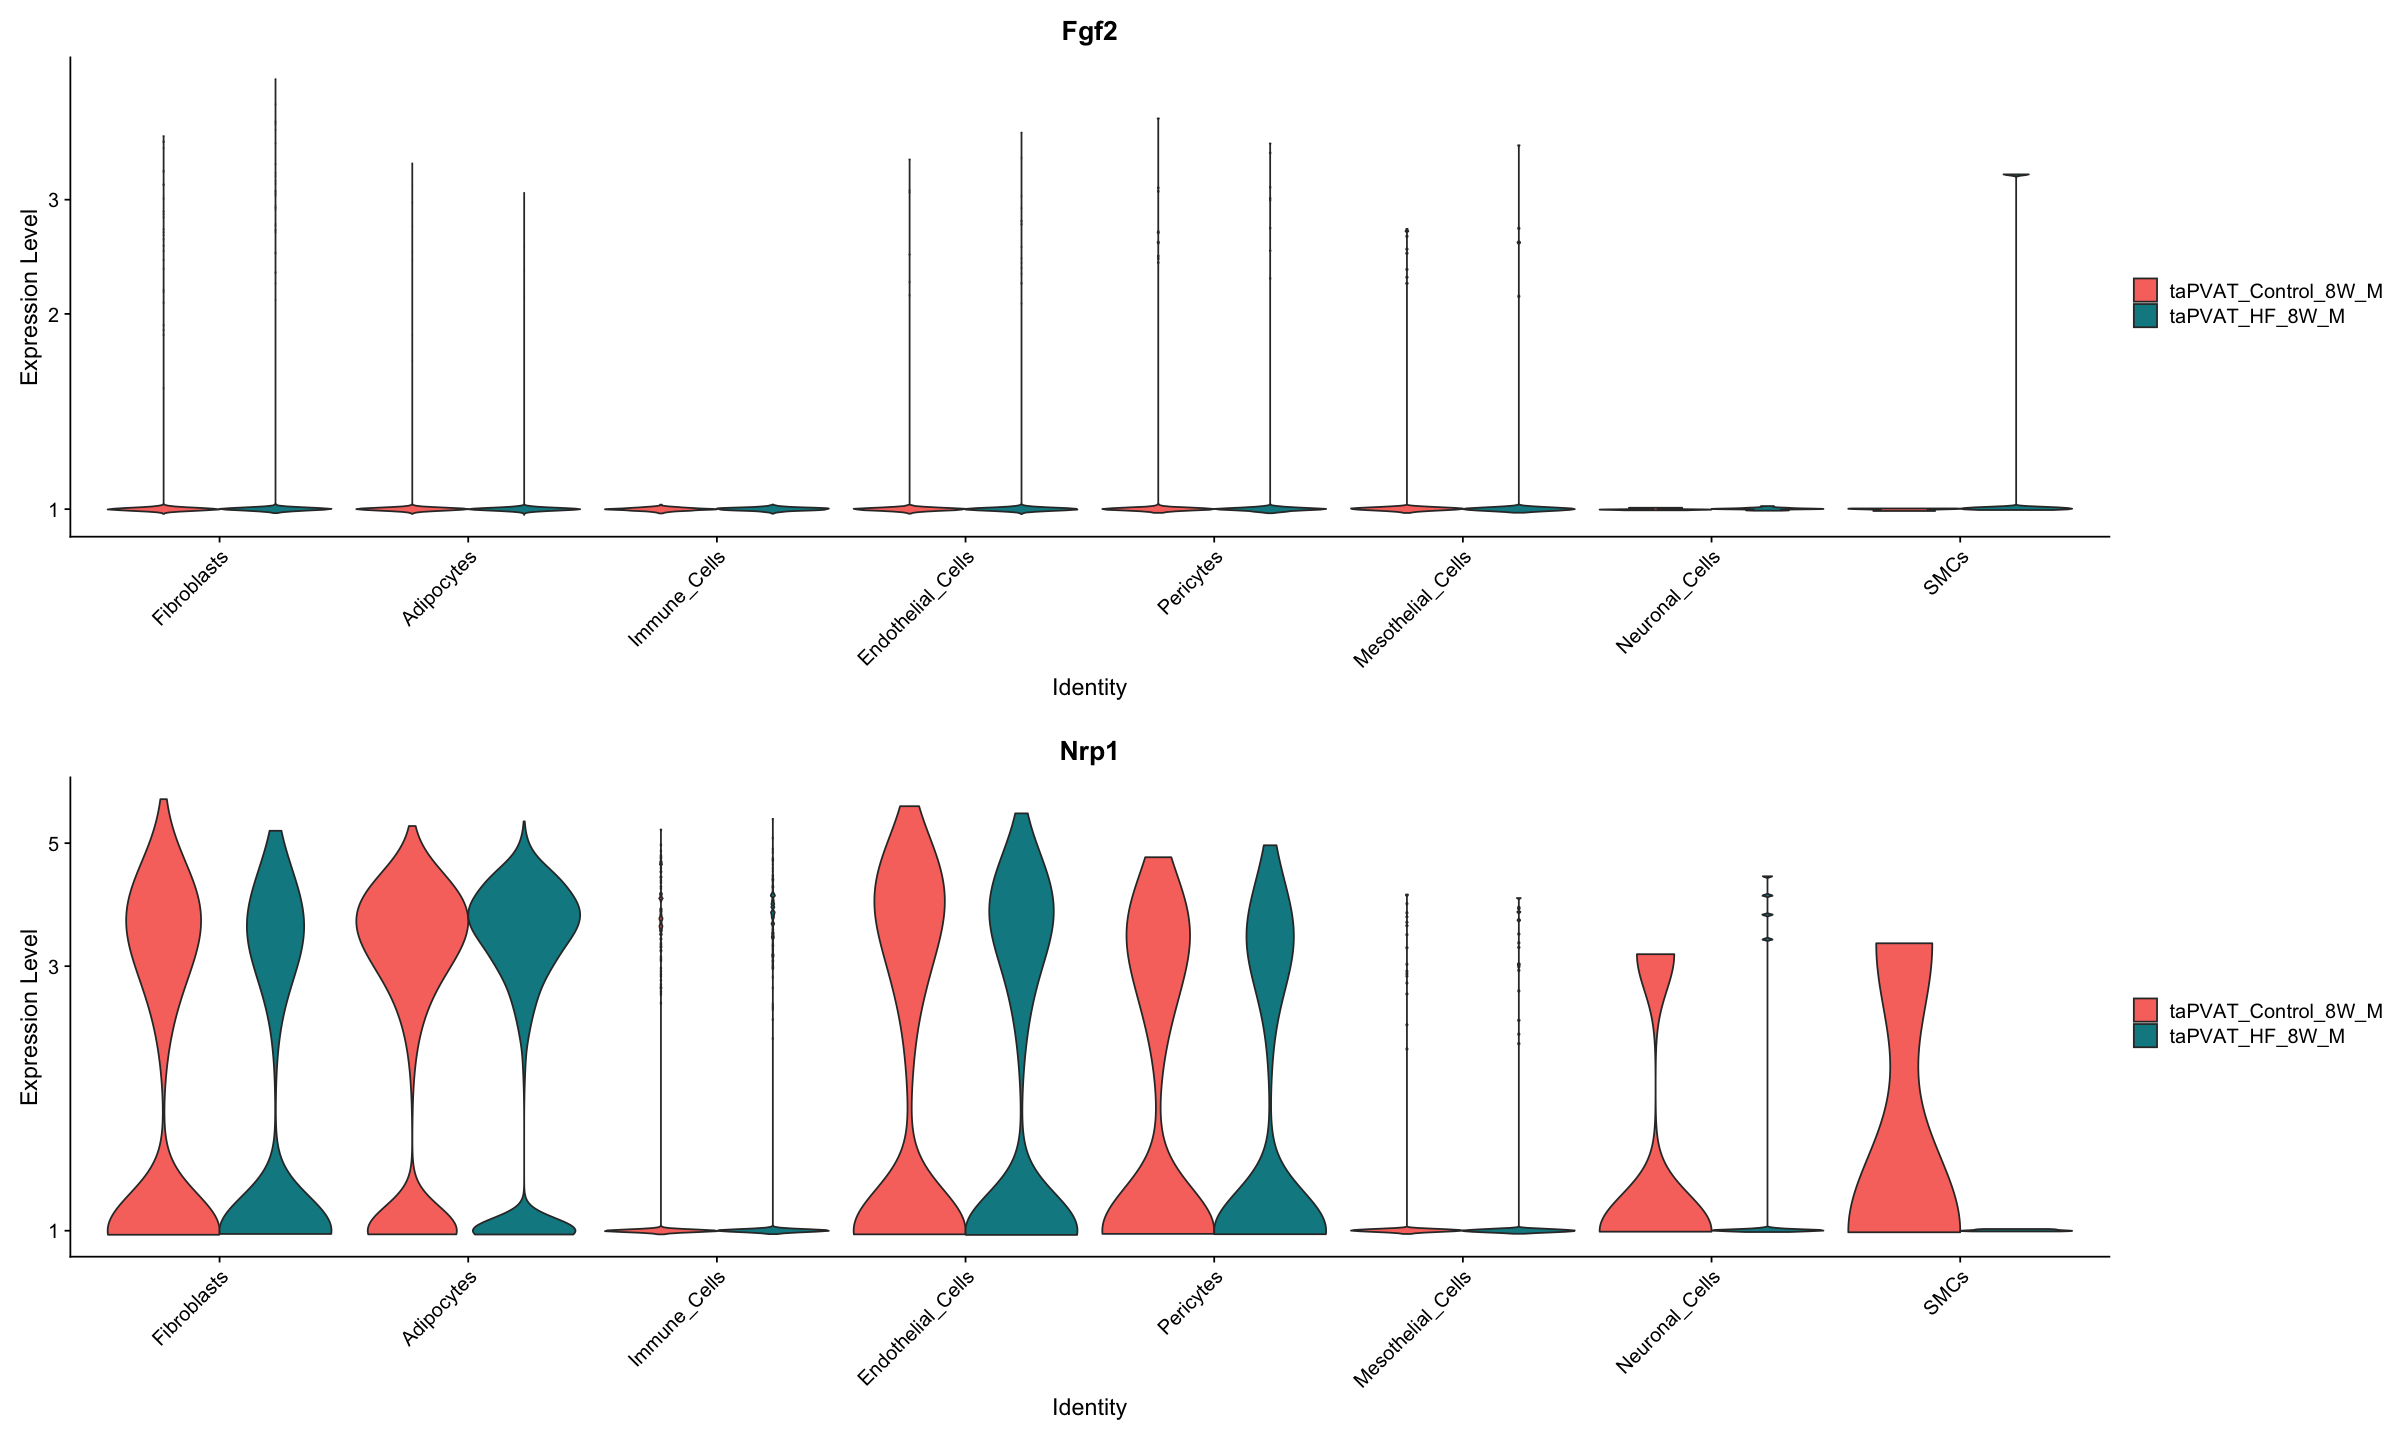

In [66]:
p1 <- VlnPlot(male_8weeks_rds,'Fgf2',split.by = 'sample_type',pt.size = 0,log=T)
p2 <- VlnPlot(male_8weeks_rds,'Nrp1',split.by = 'sample_type',pt.size = 0,log=T)
plot_grid(p1,p2,ncol=1)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call(C_tex

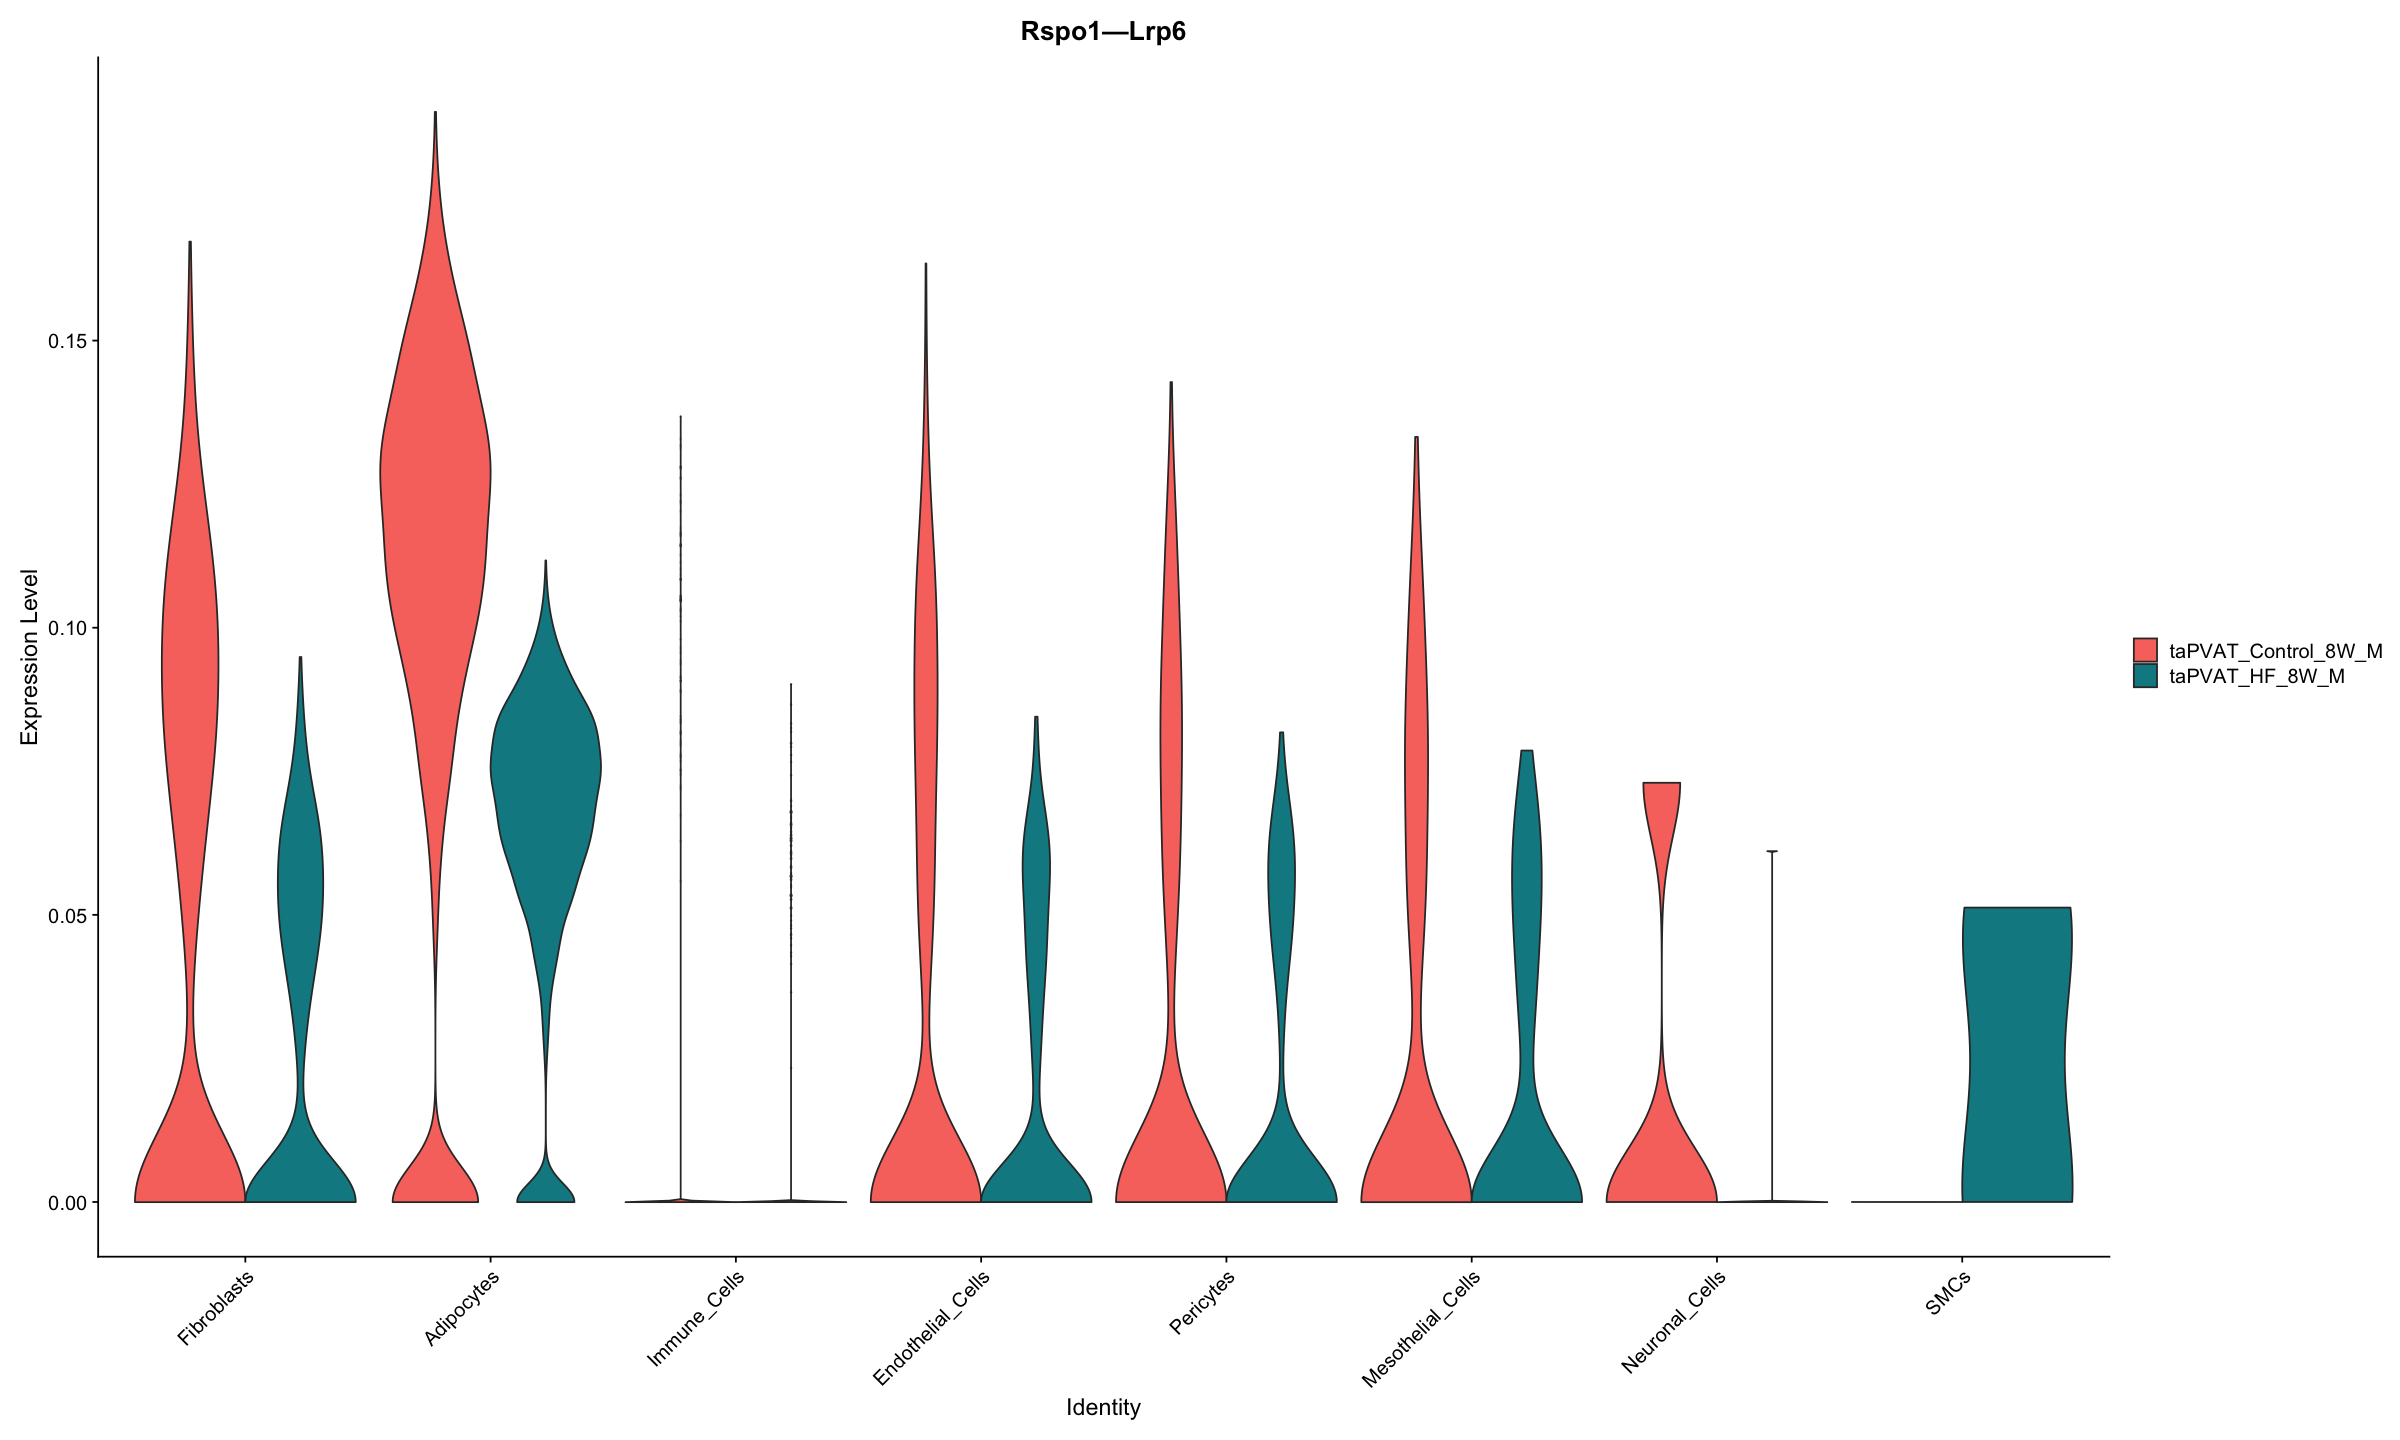

In [68]:
VlnPlot(scc.sub, 'Rspo1—Lrp6',split.by = 'Condition',pt.size = 0)

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  Tfpi—Lrp1, Calr—Lrp1, Serpine2—Lrp1, App—Lrp1, F8—Lrp1, Psap—Lrp1, Hsp90b1—Lrp1, Lpl—Lrp1, Plat—Lrp1, Lrpap1—Lrp1 
	   Nxph1—Nrxn1, Serping1—Lrp1, Psen1—Notch1, Mfap5—Notch1, Dll1—Notch1, Uba52—Notch1, Dll4—Notch1, Adam17—Notch1, Jag1—Notch1, Jag2—Notch1 
	   Rarres2—Cmklr1, Pdgfb—Lrp1, Ptn—Ptprs, Calr—Tshr, Apoe—Lrp1, Gnas—Tshr, Fn1—Tshr, Hspg2—Ptprs, Gnai2—Tshr, Icam1—Egfr 
Negative:  Lama2—Itgb1, Col1a1—Itgb1, Lamc1—Itgb1, Nid1—Itgb1, Col6a2—Itgb1, Adam9—Itgb1, Lamb1—Itgb1, Vtn—Itgb1, Adam12—Itgb1, Fn1—Itgb1 
	   Col6a1—Itgb1, Fbn1—Itgb1, Col4a1—Itgb1, Cxcl12—Itgb1, Col5a2—Itgb1, Col6a3—Itgb1, Fbln1—Itgb1, Col18a1—Itgb1, Timp2—Itgb1, Col1a2—Itgb1 
	   Hspg2—Itgb1, Adam15—Itgb1, Lama5—Itgb1, Col3a1—Itgb1, Col4a4—Itgb1, Npnt—Itgb1, Reln—Itgb1, Tgm2—Itgb1, Vcan—Itgb1, Col4a5—Itgb1 
PC_ 2 
Positive:  Vegfc—Itgb1, Col4a5—Itgb1, Vcam1—Itgb1, Reln—

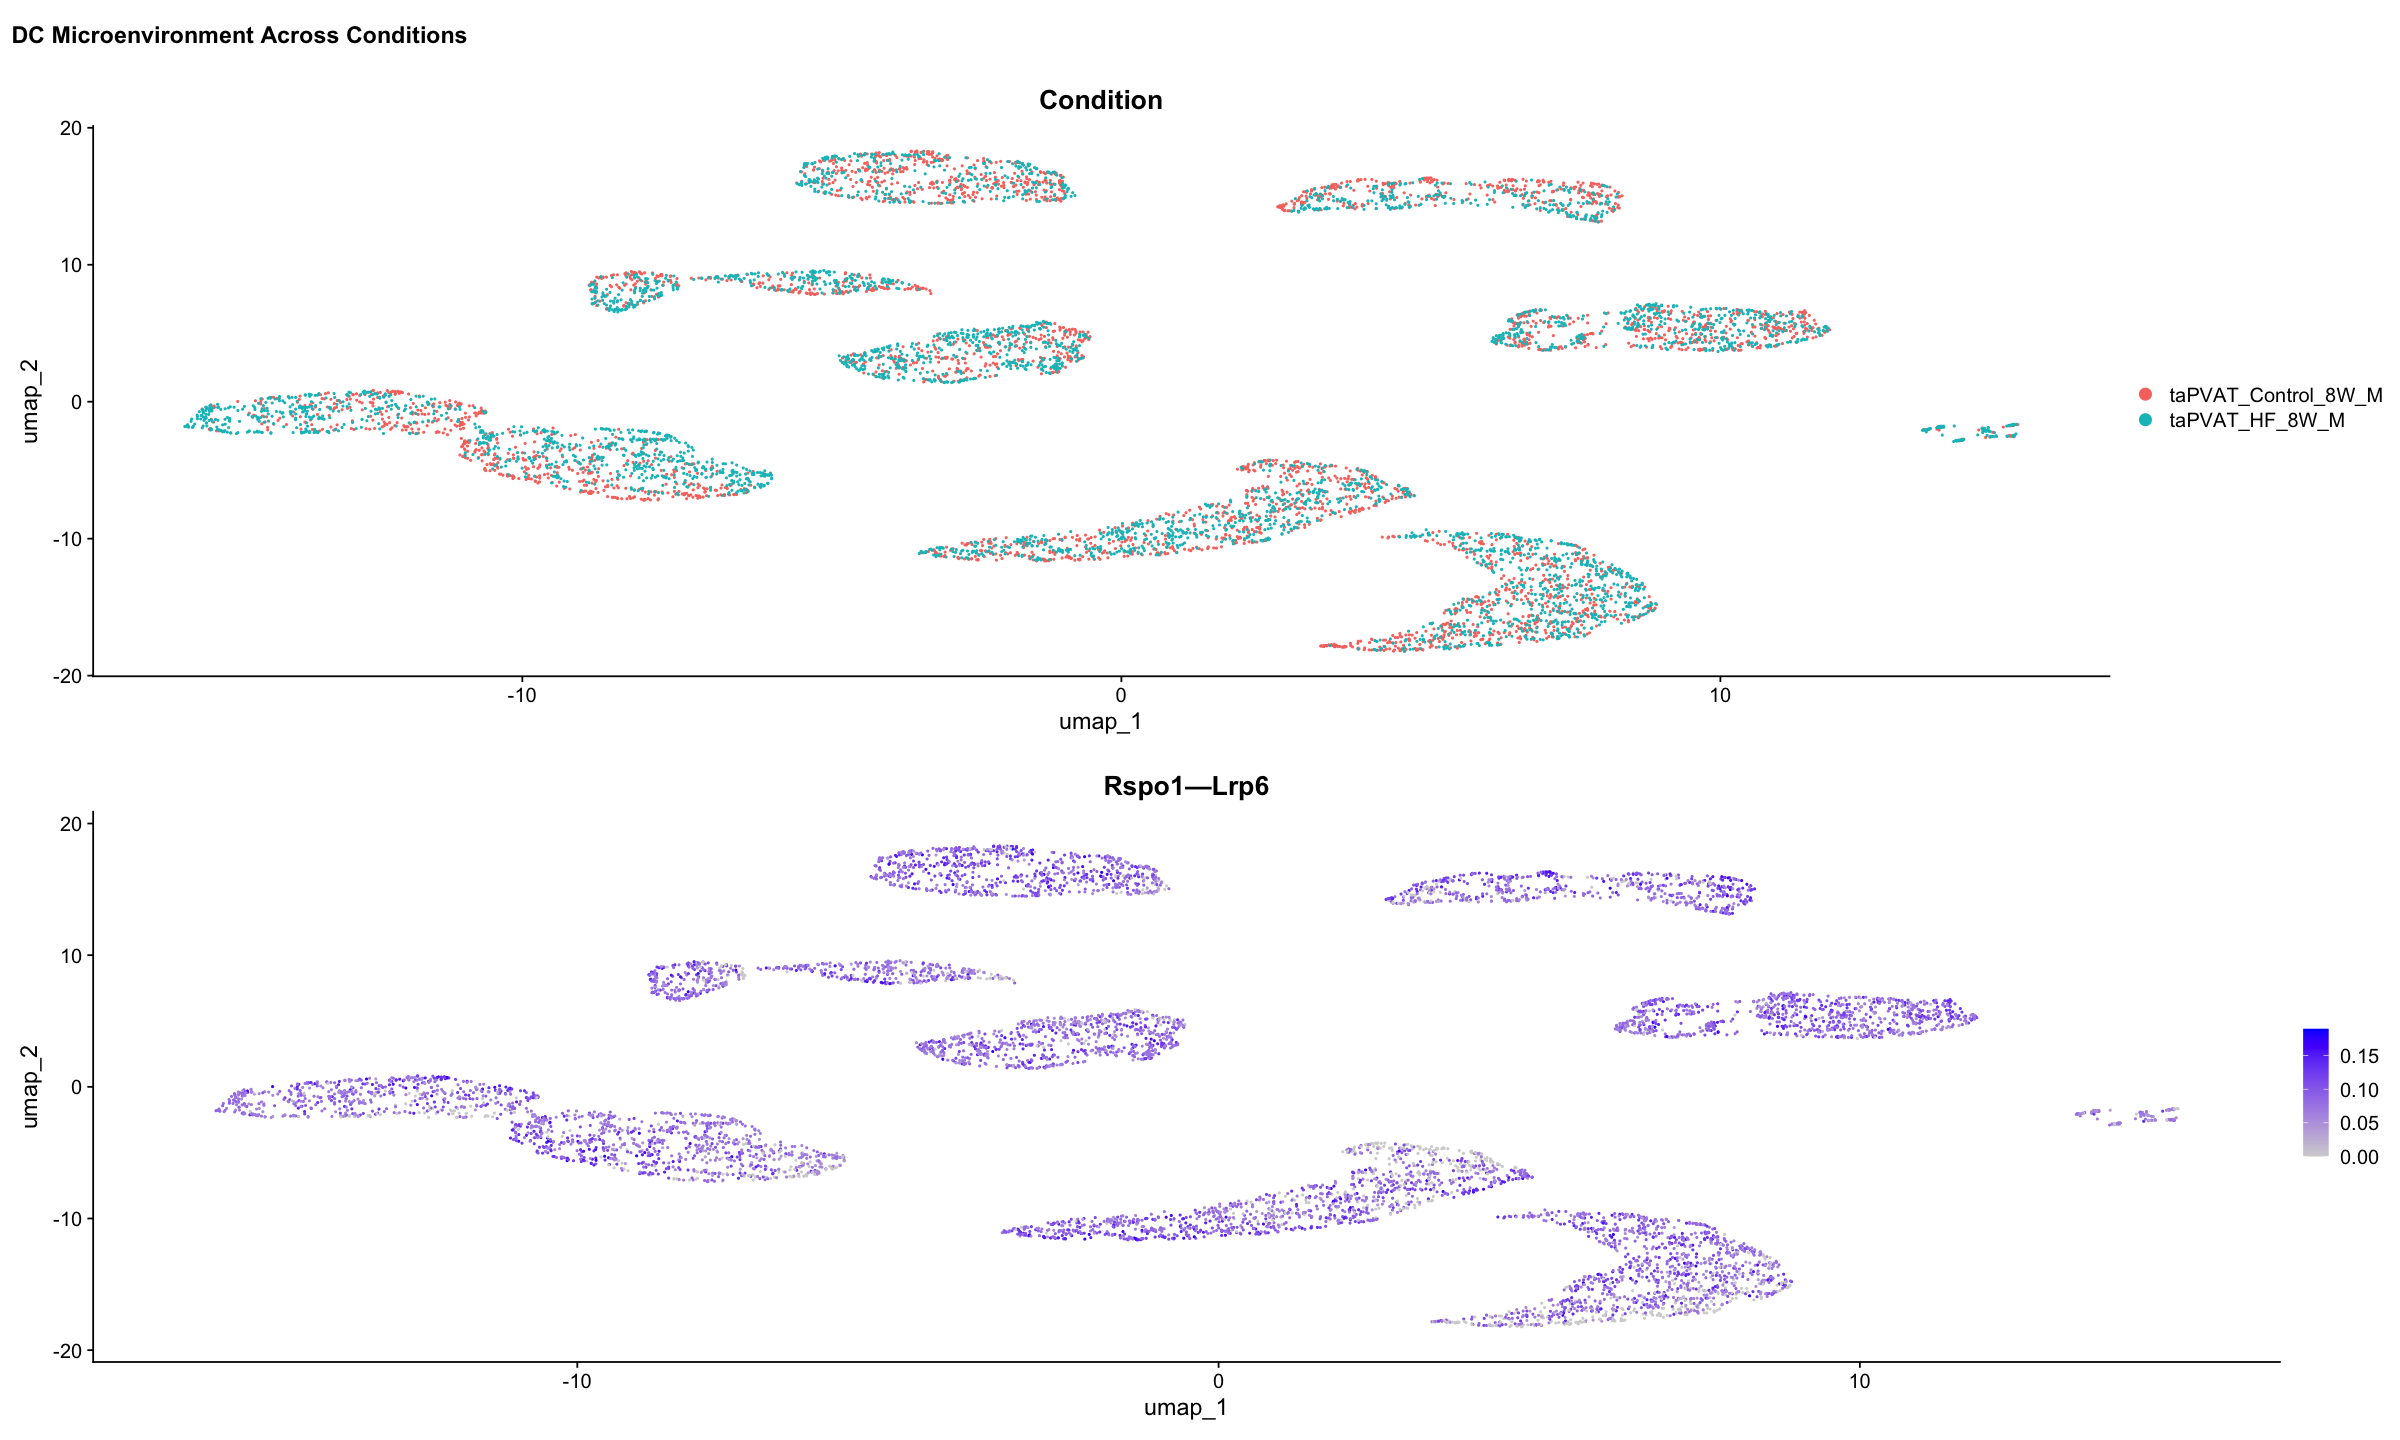

In [69]:
subs <- subset(scc.sub, idents = 'Adipocytes')
subs <- ScaleData(subs)
subs <- RunPCA(subs)
subs <- RunUMAP(subs,dims = 1:5)
p1 <- DimPlot(subs,group.by = 'Condition')
p2 <- FeaturePlot(subs,'Rspo1—Lrp6')
title <- ggdraw() + 
  draw_label(
    "DC Microenvironment Across Conditions",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
plot_grid(title,p1,p2,ncol=1,rel_heights = c(0.1, 1,1))